# Latent Diffusion Model Super Resolution (LSDR)

* Uses huggingface diffusers
* [High-Resolution Image Synthesis with Latent Diffusion Models](https://arxiv.org/abs/2112.10752)

## Installs

In [1]:
!pip install diffusers
!pip install -U transformers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 25.3 MB/s eta 0:00:00


## Imports

In [19]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from diffusers import LDMSuperResolutionPipeline
import torch

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

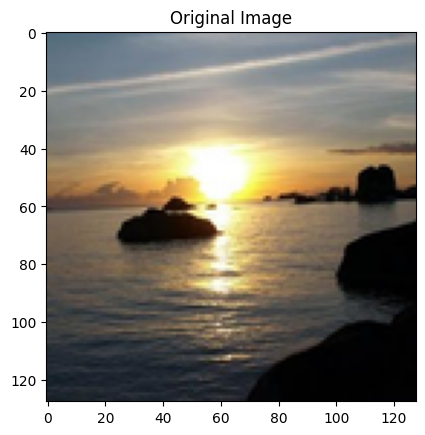

In [29]:
# load model and scheduler
pipeline = LDMSuperResolutionPipeline.from_pretrained("CompVis/ldm-super-resolution-4x-openimages")
pipeline = pipeline.to("cuda")

# set original image
orig = 'sunset128x128.png'
orig_image = Image.open(orig).convert('RGB')

plt.imshow(orig_image)
plt.title('Original Image')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'LDSR 4x Upscaling')

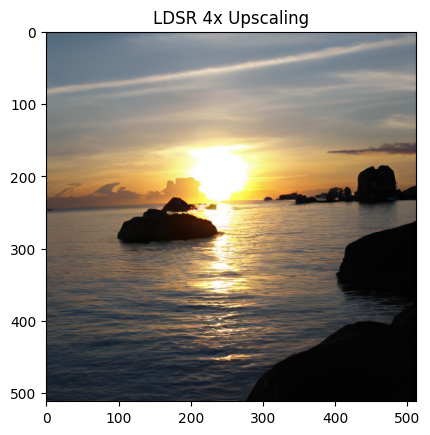

In [23]:
# run pipeline in inference (sample random noise and denoise)
upsc_image = pipeline(orig_image, num_inference_steps=100, eta=1).images[0]

# save and plot image
upsc_image.save(f"{upsc_image}_lsdr_4x.png")

plt.imshow(upsc_image)
plt.title('LDSR 4x Upscaling')

## Zoom Detail

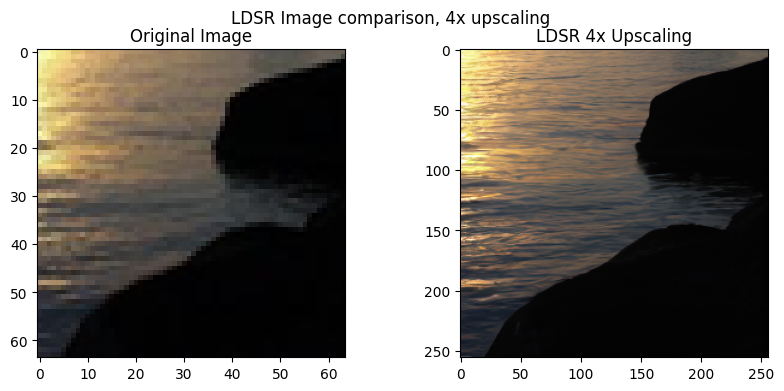

In [26]:
start,end = 64,128
orig_zoom = np.asarray(orig_image)[start:end,start:end]
upsc_zoom = np.asarray(upsc_image)[4*start:4*end,4*start:4*end]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(orig_zoom)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(upsc_zoom)
plt.title('LDSR 4x Upscaling')
plt.suptitle('LDSR Image comparison, 4x upscaling')
plt.show()